In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold



from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, zero_one_loss, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn import svm

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'
df = pd.read_csv(path_train)# содержит только имя файла, без имен папок !!!
df

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1.0,28.00,2.000,2.0,4.0,8.0,4.165,1.0,1.0,2.0,1.0,2.0,181.0,1.0,1.0
1,1.0,36.25,5.000,2.0,8.0,5.0,2.500,1.0,1.0,6.0,0.0,2.0,0.0,368.0,1.0
2,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0,18.0,0.0
3,1.0,22.67,0.165,2.0,8.0,3.0,2.250,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,25.75,0.500,2.0,8.0,8.0,0.875,1.0,0.0,0.0,1.0,2.0,491.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1.0,28.75,1.165,2.0,4.0,4.0,0.500,1.0,0.0,0.0,0.0,1.0,280.0,1.0,0.0
582,1.0,44.83,7.000,1.0,8.0,4.0,1.625,0.0,0.0,0.0,0.0,2.0,160.0,3.0,0.0
583,1.0,21.33,7.500,2.0,6.0,4.0,1.415,1.0,1.0,1.0,0.0,2.0,80.0,9801.0,1.0
584,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0,28.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       586 non-null    float64
 1   N2       586 non-null    float64
 2   N3       586 non-null    float64
 3   C4_enc   586 non-null    float64
 4   C5_enc   586 non-null    float64
 5   C6_enc   586 non-null    float64
 6   N7       586 non-null    float64
 7   C8       586 non-null    float64
 8   C9       586 non-null    float64
 9   N10      586 non-null    float64
 10  C11      586 non-null    float64
 11  C12_enc  586 non-null    float64
 12  N13      586 non-null    float64
 13  N14      586 non-null    float64
 14  Target   586 non-null    float64
dtypes: float64(15)
memory usage: 68.8 KB


In [4]:
df.isna().sum()


C1         0
N2         0
N3         0
C4_enc     0
C5_enc     0
C6_enc     0
N7         0
C8         0
C9         0
N10        0
C11        0
C12_enc    0
N13        0
N14        0
Target     0
dtype: int64

In [5]:
df.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.679181,31.718737,4.818660,1.771331,7.354949,4.742321,2.342773,0.530717,0.436860,2.498294,0.462457,1.928328,182.001706,972.648464,0.445392
std,0.467190,11.903846,4.973202,0.428391,3.675786,2.006864,3.505711,0.499482,0.496421,4.994441,0.499015,0.306594,174.576425,5156.884823,0.497434
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.830000,1.085000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,73.500000,1.000000,0.000000
50%,1.000000,28.920000,3.000000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,5.000000,0.000000
75%,1.000000,38.065000,7.070000,2.000000,10.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,266.750000,434.000000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df.drop(['Target'],axis=1)
y = df['Target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)# соразмерны
print(y_test.shape)

(410, 14)
(410,)
(176, 14)
(176,)


In [9]:
cat_features = ['C1','C8','C9','C11']
num_features = ['N2','N3','N7','N10','N13','N14','C4_enc', 'C5_enc', 'C6_enc', 'C12_enc']
num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20,random_state=42)),
    ('scaler', RobustScaler())])

In [10]:
CT = ColumnTransformer([
        ("num", num, num_features),
     
        ("cat", StandardScaler(), cat_features)
        ]).set_output(transform='pandas')

display(CT)
ct = CT.fit_transform(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   random_state=42)),
                                                 ('scaler', RobustScaler())]),
                                 ['N2', 'N3', 'N7', 'N10', 'N13', 'N14',
                                  'C4_enc', 'C5_enc', 'C6_enc', 'C12_enc']),
                                ('cat', StandardScaler(),
                                 ['C1', 'C8', 'C9', 'C11'])])

###### Найдем несколько лучших моделей и применим к ним войтинг

In [11]:
model0 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', KNeighborsClassifier())
])
param_grid = {
    'preproc__num__scaler':[StandardScaler(), RobustScaler(),MinMaxScaler(),CT],
    'estimator__n_neighbors': np.arange(40,50,2),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p':[1,2,3]
    
}



grid_search = GridSearchCV(model0, param_grid, cv=10,scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           random_state=42)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['N2',
                                                                          'N3',
                                                                          'N7',
                                                                          'N10',
                                                                          'N13',
                                                                          'N14',
                                                                          'C4_enc',
                                                                          'C5_enc',
                                                                          'C6_enc',
                                                                          'C12_enc']),
                                                                        ('cat',
                                                                         StandardScaler(),
                                                                         ['C1',
                                                                          'C8',
                                                                          'C9',
                                                                          'C11'])])),
                                       ('estimator', KNeighborsCl...
                         'preproc__num__scaler': [StandardScaler(),
                                                  RobustScaler(),
                                                  MinMaxScaler(),
                                                  ColumnTransformer(transformers=[('num',
                                                                                   Pipeline(steps=[('missing_num',
                                                                                                    IterativeImputer(max_iter=20,
                                                                                                                     random_state=42)),
                                                                                                   ('scaler',
                                                                                                    RobustScaler())]),
                                                                                   ['N2',
                                                                                    'N3',
                                                                                    'N7',
                                                                                    'N10',
                                                                                    'N13',
                                                                                    'N14',
                                                                                    'C4_enc',
                                                                                    'C5_enc',
                                                                                    'C6_enc',
                                                                                    'C12_enc']),
                                                                               

In [12]:

print("Наилучшие параметры:" ,grid_search.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_search.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_search.score(X_test, y_test))

Наилучшие параметры: {'estimator__n_neighbors': 48, 'estimator__p': 1, 'estimator__weights': 'uniform', 'preproc__num__scaler': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.8709825614415576
Правильность для наилучшей модели на тестовом наборе: 0.8405797101449276


In [13]:
model0 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', KNeighborsClassifier())
])
param_grid = {
    'preproc__num__scaler':[StandardScaler(), RobustScaler(),MinMaxScaler(),CT],
    'estimator__n_neighbors': np.arange(20,42,2),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p':[1,2,3]
    
}



grid_search = GridSearchCV(model0, param_grid, cv=10,scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
660 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
660 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           random_state=42)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['N2',
                                                                          'N3',
                                                                          'N7',
                                                                          'N10',
                                                                          'N13',
                                                                          'N14',
                                                                          'C4_enc',
                                                                          'C5_enc',
                                                                          'C6_enc',
                                                                          'C12_enc']),
                                                                        ('cat',
                                                                         StandardScaler(),
                                                                         ['C1',
                                                                          'C8',
                                                                          'C9',
                                                                          'C11'])])),
                                       ('estimator', KNeighborsCl...
                         'preproc__num__scaler': [StandardScaler(),
                                                  RobustScaler(),
                                                  MinMaxScaler(),
                                                  ColumnTransformer(transformers=[('num',
                                                                                   Pipeline(steps=[('missing_num',
                                                                                                    IterativeImputer(max_iter=20,
                                                                                                                     random_state=42)),
                                                                                                   ('scaler',
                                                                                                    RobustScaler())]),
                                                                                   ['N2',
                                                                                    'N3',
                                                                                    'N7',
                                                                                    'N10',
                                                                                    'N13',
                                                                                    'N14',
                                                                                    'C4_enc',
                                                                                    'C5_enc',
                                                                                    'C6_enc',
                                                                                    'C12_enc']),
                                                                               

In [14]:
print("Наилучшие параметры:" ,grid_search.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_search.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_search.score(X_test, y_test))

Наилучшие параметры: {'estimator__n_neighbors': 32, 'estimator__p': 3, 'estimator__weights': 'uniform', 'preproc__num__scaler': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.8698877545219009
Правильность для наилучшей модели на тестовом наборе: 0.8187919463087249


In [15]:
model0 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', KNeighborsClassifier())
])
param_grid = {
    'preproc__num__scaler':[StandardScaler(), RobustScaler(),MinMaxScaler(),CT],
    'estimator__n_neighbors': np.arange(51,70,2),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p':[1,2,3]
    
}



grid_search = GridSearchCV(model0, param_grid, cv=10,scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           random_state=42)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['N2',
                                                                          'N3',
                                                                          'N7',
                                                                          'N10',
                                                                          'N13',
                                                                          'N14',
                                                                          'C4_enc',
                                                                          'C5_enc',
                                                                          'C6_enc',
                                                                          'C12_enc']),
                                                                        ('cat',
                                                                         StandardScaler(),
                                                                         ['C1',
                                                                          'C8',
                                                                          'C9',
                                                                          'C11'])])),
                                       ('estimator', KNeighborsCl...
                         'preproc__num__scaler': [StandardScaler(),
                                                  RobustScaler(),
                                                  MinMaxScaler(),
                                                  ColumnTransformer(transformers=[('num',
                                                                                   Pipeline(steps=[('missing_num',
                                                                                                    IterativeImputer(max_iter=20,
                                                                                                                     random_state=42)),
                                                                                                   ('scaler',
                                                                                                    RobustScaler())]),
                                                                                   ['N2',
                                                                                    'N3',
                                                                                    'N7',
                                                                                    'N10',
                                                                                    'N13',
                                                                                    'N14',
                                                                                    'C4_enc',
                                                                                    'C5_enc',
                                                                                    'C6_enc',
                                                                                    'C12_enc']),
                                                                               

In [16]:
print("Наилучшие параметры:" ,grid_search.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_search.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_search.score(X_test, y_test))

Наилучшие параметры: {'estimator__n_neighbors': 67, 'estimator__p': 1, 'estimator__weights': 'uniform', 'preproc__num__scaler': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.8718562649468401
Правильность для наилучшей модели на тестовом наборе: 0.8405797101449276


In [17]:
model0 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', KNeighborsClassifier())
])
param_grid = {
    'preproc__num__scaler':[StandardScaler(), RobustScaler(),MinMaxScaler()],
    'estimator__n_neighbors': np.arange(31,50,2),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p':[1,2,3]
    
}



grid_search = GridSearchCV(model0, param_grid, cv=10,scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           random_state=42)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['N2',
                                                                          'N3',
                                                                          'N7',
                                                                          'N10',
                                                                          'N13',
                                                                          'N14',
                                                                          'C4_enc',
                                                                          'C5_enc',
                                                                          'C6_enc',
                                                                          'C12_enc']),
                                                                        ('cat',
                                                                         StandardScaler(),
                                                                         ['C1',
                                                                          'C8',
                                                                          'C9',
                                                                          'C11'])])),
                                       ('estimator', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'estimator__n_neighbors': array([31, 33, 35, 37, 39, 41, 43, 45, 47, 49]),
                         'estimator__p': [1, 2, 3],
                         'estimator__weights': ['uniform', 'distance'],
                         'preproc__num__scaler': [StandardScaler(),
                                                  RobustScaler(),
                                                  MinMaxScaler()]},
             scoring='f1')

In [18]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, grid_search.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, grid_search.predict(X_test))))

Правильность на обучающем наборе: 0.869
Правильность на тестовом наборе: 0.805


##### Нашли лучшую модель кнн. Далее считаю векторы, в конечном варианте сетка обрезана.

In [19]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.01,0.015, 0.02,0.03,0.04,0.05, 0.06,0.07])
gamma=[0.019, 0.02,0.03,0.04,0.05, 0.06,0.07,0.1,1.1,1.2,1.3]

param_grid =[
    {'preprocessing': [StandardScaler(),MinMaxScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma,
     'classifier__kernel':[ 'rbf', 'sigmoid']
     
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)


# # Запись модели
# with open('svc-model.pkl', 'wb') as f:
#     pickle.dump(grid, f)

# # Вызов модели
# with open('svc-model.pkl', 'rb') as f:
#     s = pickle.load(f)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid=[{'classifier': [SVC(C=0.02, gamma=1.1,
                                             kernel='sigmoid')],
                          'classifier__C': array([0.01 , 0.01 , 0.015, 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 ]),
                          'classifier__gamma': [0.019, 0.02, 0.03, 0.04, 0.05,
                                                0.06, 0.07, 0.1, 1.1, 1.2,
                                                1.3],
                          'classifier__kernel': ['rbf', 'sigmoid'],
                          'preprocessing': [StandardScaler(), MinMaxScaler()]}],
             return_train_score=True, scoring='f1')

In [20]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'classifier': SVC(C=0.02, gamma=1.1, kernel='sigmoid'), 'classifier__C': 0.02, 'classifier__gamma': 1.1, 'classifier__kernel': 'sigmoid', 'preprocessing': StandardScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.8782675206250966
Правильность для наилучшей модели на тестовом наборе: 0.8137931034482758


Просчитываем случаный лес

In [21]:
model0 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', RandomForestClassifier())
])
param_grid = {
    'preproc':[StandardScaler(), RobustScaler(),MinMaxScaler()],
    'estimator__criterion': ['gini'],
    'estimator__n_estimators': [1000],
    'estimator__max_features':['sqrt', None],
  'estimator__min_samples_leaf':np.arange(1,3)
    
    
}

# Определите модель Pipeline с преобразованием данных и классификатором

grid_search = GridSearchCV(model0, param_grid, cv=10,scoring='f1',n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           random_state=42)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['N2',
                                                                          'N3',
                                                                          'N7',
                                                                          'N10',
                                                                          'N13',
                                                                          'N14',
                                                                          'C4_enc',
                                                                          'C5_enc',
                                                                          'C6_enc',
                                                                          'C12_enc']),
                                                                        ('cat',
                                                                         StandardScaler(),
                                                                         ['C1',
                                                                          'C8',
                                                                          'C9',
                                                                          'C11'])])),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['gini'],
                         'estimator__max_features': ['sqrt', None],
                         'estimator__min_samples_leaf': array([1, 2]),
                         'estimator__n_estimators': [1000],
                         'preproc': [StandardScaler(), RobustScaler(),
                                     MinMaxScaler()]},
             scoring='f1')

In [22]:
print("Наилучшие параметры:" ,grid_search.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_search.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_search.score(X_test, y_test))

Наилучшие параметры: {'estimator__criterion': 'gini', 'estimator__max_features': None, 'estimator__min_samples_leaf': 2, 'estimator__n_estimators': 1000, 'preproc': StandardScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.8830769606586844
Правильность для наилучшей модели на тестовом наборе: 0.8243243243243242


##### Строим график для поиска оптимального количества estimators. Оптимально около 50

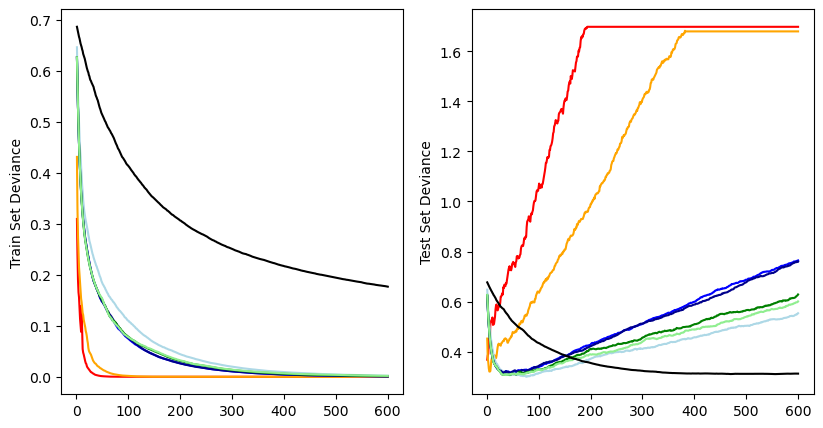

In [43]:

labels, y = np.unique(df.Target, return_inverse=True)


original_params = {
    "n_estimators": 600,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

ax3 = fig.add_subplot(132)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, баггинг=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, баггинг=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = f1_score(y_test, y_pred)
        
   
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )


ax1.set_ylabel("Train Set Deviance")

ax3.set_ylabel("Test Set Deviance")

plt.show()

In [44]:
pipe_svc = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',    svm.SVC(C=0.02, gamma=1.1, kernel='sigmoid'))])
pipe_knn = Pipeline([('preprocessing',MinMaxScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=48, p = 1, weights='uniform'))])
pipe_gbrt = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',  GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=42))])

In [45]:

pipe_svc.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_gbrt.fit(X_train, y_train)


Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(min_samples_split=5,
                                            n_estimators=50, random_state=42,
                                            subsample=0.75))])

In [46]:
eclf_best = VotingClassifier(
    estimators=[ ('rf', pipe_knn), ('knn', pipe_gbrt)],
    voting='soft', weights=[5, 8])

In [47]:
eclf_best.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                              ('classifier',
                                               KNeighborsClassifier(n_neighbors=48,
                                                                    p=1))])),
                             ('knn',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               GradientBoostingClassifier(min_samples_split=5,
                                                                          n_estimators=50,
                                                                          random_state=42,
                                                                          subsample=0.75))]))],
                 voting='soft', weights=[5, 8])

In [48]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, eclf_best.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, eclf_best.predict(X_test))))

Правильность на обучающем наборе: 0.931
Правильность на тестовом наборе: 0.871


##### Поробуем другие комбинации алгоритмов в войтинге

In [49]:
pipe_rf = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',    RandomForestClassifier(n_estimators=1000, criterion='gini',max_features=None, min_samples_leaf=2, random_state=42))])
pipe_knn = Pipeline([('preprocessing',MinMaxScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=48, p = 1, weights='uniform'))])
pipe_gbrt = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',  GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=42))])

In [50]:
pipe_rf.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_gbrt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(min_samples_split=5,
                                            n_estimators=50, random_state=42,
                                            subsample=0.75))])

In [51]:
eclf = VotingClassifier(
    estimators=[('1',pipe_rf), ('rf', pipe_knn), ('knn', pipe_gbrt)],
    voting='soft', weights=[11, 10,4])

In [52]:
eclf.fit(X_train, y_train)


VotingClassifier(estimators=[('1',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               RandomForestClassifier(max_features=None,
                                                                      min_samples_leaf=2,
                                                                      n_estimators=1000,
                                                                      random_state=42))])),
                             ('rf',
                              Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                              ('classifier',
                                               KNeighborsClassifier(n_neighbors=48,
                                                                    p=1))])),
                             ('knn',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               GradientBoostingClassifier(min_samples_split=5,
                                                                          n_estimators=50,
                                                                          random_state=42,
                                                                          subsample=0.75))]))],
                 voting='soft', weights=[11, 10, 4])

In [53]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, eclf.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, eclf.predict(X_test))))


Правильность на обучающем наборе: 0.943
Правильность на тестовом наборе: 0.845


In [54]:
pipe_rf = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',    RandomForestClassifier(n_estimators=1000, criterion='gini',max_features=None, min_samples_leaf=2, random_state=42))])
pipe_knn = Pipeline([('preprocessing',MinMaxScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=48, p = 1, weights='uniform'))])
pipe_gbrt = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',  GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=42))])

e_s_clf = StackingClassifier(
        estimators = [
            ('lr', pipe_rf), 
            ('rf', pipe_knn), 
            ('gnb', pipe_gbrt)],
        final_estimator = eclf_best,
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('preprocessing',
                                                 StandardScaler()),
                                                ('classifier',
                                                 RandomForestClassifier(max_features=None,
                                                                        min_samples_leaf=2,
                                                                        n_estimators=1000,
                                                                        random_state=42))])),
                               ('rf',
                                Pipeline(steps=[('preprocessing',
                                                 MinMaxScaler()),
                                                ('classifier',
                                                 KNeighborsClassifier(n_neighbors=48,
                                                                      p=1))])),
                               ('gnb',
                                Pipeline(steps=[('preprocess...
                   final_estimator=VotingClassifier(estimators=[('rf',
                                                                 Pipeline(steps=[('preprocessing',
                                                                                  MinMaxScaler()),
                                                                                 ('classifier',
                                                                                  KNeighborsClassifier(n_neighbors=48,
                                                                                                       p=1))])),
                                                                ('knn',
                                                                 Pipeline(steps=[('preprocessing',
                                                                                  StandardScaler()),
                                                                                 ('classifier',
                                                                                  GradientBoostingClassifier(min_samples_split=5,
                                                                                                             n_estimators=50,
                                                                                                             random_state=42,
                                                                                                             subsample=0.75))]))],
                                                    voting='soft',
                                                    weights=[5, 8]),
                   stack_method='predict_proba')

In [55]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, e_s_clf.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, e_s_clf.predict(X_test))))

Правильность на обучающем наборе: 0.915
Правильность на тестовом наборе: 0.832


In [56]:
pipe_knn = Pipeline([('preprocessing',MinMaxScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=48, p = 1, weights='uniform'))])
pipe_gbrt = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',  GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=42))])
pipe_e = e_s_clf


In [57]:
pipe_e.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_gbrt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(min_samples_split=5,
                                            n_estimators=50, random_state=42,
                                            subsample=0.75))])

In [58]:
eclf2 = VotingClassifier(
    estimators=[('1',pipe_e), ('rf', pipe_knn), ('knn', pipe_gbrt)],
    voting='soft', weights=[11, 10,4])

In [59]:
eclf2.fit(X_train, y_train)

VotingClassifier(estimators=[('1',
                              StackingClassifier(estimators=[('lr',
                                                              Pipeline(steps=[('preprocessing',
                                                                               StandardScaler()),
                                                                              ('classifier',
                                                                               RandomForestClassifier(max_features=None,
                                                                                                      min_samples_leaf=2,
                                                                                                      n_estimators=1000,
                                                                                                      random_state=42))])),
                                                             ('rf',
                                                              Pipeline(steps=[('preprocessing',
                                                                               MinMaxScaler()),
                                                                              ('classifier',
                                                                               KNeighborsClassifier(n_neighbors=48,
                                                                                                    p=1))])),
                                                             (...
                                                                                           8]),
                                                 stack_method='predict_proba')),
                             ('rf',
                              Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                              ('classifier',
                                               KNeighborsClassifier(n_neighbors=48,
                                                                    p=1))])),
                             ('knn',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               GradientBoostingClassifier(min_samples_split=5,
                                                                          n_estimators=50,
                                                                          random_state=42,
                                                                          subsample=0.75))]))],
                 voting='soft', weights=[11, 10, 4])

In [60]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, eclf2.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, eclf2.predict(X_test))))

Правильность на обучающем наборе: 0.910
Правильность на тестовом наборе: 0.847


In [61]:
eclf3 = VotingClassifier(
    estimators=[('1',eclf_best), ('rf', pipe_knn), ('knn', pipe_gbrt)],
    voting='soft', weights=[11, 6,4])

In [62]:
eclf3.fit(X_train, y_train)

VotingClassifier(estimators=[('1',
                              VotingClassifier(estimators=[('rf',
                                                            Pipeline(steps=[('preprocessing',
                                                                             MinMaxScaler()),
                                                                            ('classifier',
                                                                             KNeighborsClassifier(n_neighbors=48,
                                                                                                  p=1))])),
                                                           ('knn',
                                                            Pipeline(steps=[('preprocessing',
                                                                             StandardScaler()),
                                                                            ('classifier',
                                                                             GradientBoostingClassifier(min_samples_split=5,
                                                                                                        n_estimators=50,
                                                                                                        random_state=42,
                                                                                                        subsample=0.75))]))],
                                               voting='soft', weights=[5, 8])),
                             ('rf',
                              Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                              ('classifier',
                                               KNeighborsClassifier(n_neighbors=48,
                                                                    p=1))])),
                             ('knn',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               GradientBoostingClassifier(min_samples_split=5,
                                                                          n_estimators=50,
                                                                          random_state=42,
                                                                          subsample=0.75))]))],
                 voting='soft', weights=[11, 6, 4])

In [63]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, eclf3.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, eclf3.predict(X_test))))

Правильность на обучающем наборе: 0.926
Правильность на тестовом наборе: 0.863


In [64]:
eclf_rfgbrt = VotingClassifier(
    estimators=[ ('rf', eclf3), ('knn', pipe_gbrt)],
    voting='soft', weights=[3, 8])

In [65]:
eclf_rfgbrt .fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              VotingClassifier(estimators=[('1',
                                                            VotingClassifier(estimators=[('rf',
                                                                                          Pipeline(steps=[('preprocessing',
                                                                                                           MinMaxScaler()),
                                                                                                          ('classifier',
                                                                                                           KNeighborsClassifier(n_neighbors=48,
                                                                                                                                p=1))])),
                                                                                         ('knn',
                                                                                          Pipeline(steps=[('preprocessing',
                                                                                                           StandardScaler()),
                                                                                                          ('classifier',
                                                                                                           GradientBoostingClassifier(min_samples_split=5,
                                                                                                                                      n_estimators=50,
                                                                                                                                      ran...
                                                                             StandardScaler()),
                                                                            ('classifier',
                                                                             GradientBoostingClassifier(min_samples_split=5,
                                                                                                        n_estimators=50,
                                                                                                        random_state=42,
                                                                                                        subsample=0.75))]))],
                                               voting='soft',
                                               weights=[11, 6, 4])),
                             ('knn',
                              Pipeline(steps=[('preprocessing',
                                               StandardScaler()),
                                              ('classifier',
                                               GradientBoostingClassifier(min_samples_split=5,
                                                                          n_estimators=50,
                                                                          random_state=42,
                                                                          subsample=0.75))]))],
                 voting='soft', weights=[3, 8])

In [66]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, eclf_rfgbrt.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, eclf_rfgbrt.predict(X_test))))

Правильность на обучающем наборе: 0.954
Правильность на тестовом наборе: 0.855


In [86]:
pipe_rf = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',    RandomForestClassifier(n_estimators=1000, criterion='gini',max_features=None, min_samples_leaf=2, random_state=42))])
pipe_knn = LogisticRegression()
pipe_gbrt = Pipeline([('preprocessing',StandardScaler()), 
                    ('classifier',  GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=42))])

e_s_clf = StackingClassifier(
        estimators = [
            ('lr', pipe_rf), 
            ('rf', pipe_knn), 
            ('gnb', pipe_gbrt)],
        final_estimator = GradientBoostingClassifier(learning_rate=0.1, subsample=1, min_samples_split=5, n_estimators=50,random_state=42),
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('preprocessing',
                                                 StandardScaler()),
                                                ('classifier',
                                                 RandomForestClassifier(max_features=None,
                                                                        min_samples_leaf=2,
                                                                        n_estimators=1000,
                                                                        random_state=42))])),
                               ('rf', LogisticRegression()),
                               ('gnb',
                                Pipeline(steps=[('preprocessing',
                                                 StandardScaler()),
                                                ('classifier',
                                                 GradientBoostingClassifier(min_samples_split=5,
                                                                            n_estimators=50,
                                                                            random_state=42,
                                                                            subsample=0.75))]))],
                   final_estimator=GradientBoostingClassifier(min_samples_split=5,
                                                              n_estimators=50,
                                                              random_state=42,
                                                              subsample=1),
                   stack_method='predict_proba')

In [88]:
print('Правильность на обучающем наборе: {:.3f}'.format(f1_score(y_train, e_s_clf.predict(X_train))))

print('Правильность на тестовом наборе: {:.3f}'.format(f1_score(y_test, e_s_clf.predict(X_test))))

Правильность на обучающем наборе: 0.939
Правильность на тестовом наборе: 0.817


### Лучшей моделью стал войтинг из 3 алгоритмов (eclf_best)